# Assignment #1 - Basic Data Exploration, Visualization, and Analysis

## Assignment Overview

In this assignment you'll load some data into a python notebook, and use some basic functions to do some basic analysis. Each section asks you to either calculate some answers or explore some information found in the data. When generating your answers, try to think about a few factors that can make your code better:
<ul>
<li> Present the answers clearly. Use the markdown cells, code comments, and formatting to help make your answers readable. One of the features of notebooks is that they allow us to combine code and commentary, and we need to ensure both are readable. Refer to the guide in the guides folder of the exercises workbook for an explaination and examples of different formatting. 
<li> Make your code clear. It is easy to make sense of small pieces of code, for short periods of time, so if your code makes little sense here, it won't really hurt your ability to find the answers. If you need to come back to it later, or others need to edit it, having code that doesn't make sense is a big issue. Use things like clearly named variables, comments, and spacing to make things readable. Even in this course, if you are looking back to something from 2 months ago for the project, it is far easier to understand code that is cleaned up a little. 
<li> Structure the code well. If there is some kind of repetitive task, it should likely be moved into a function. If there is something that happens several times, it should be in a loop. Having well structured code makes it easy to reuse stuff later, understand how things work, debug errors, and share code with others. This is something to keep in the back of your minds, right now you may not have much experience to lean on to judge how things should be, as you read, adjust, and write code it will become more clear. 
</ul>

## Grading

This assignment will be graded in two portions:
<ul>
<li> Correctness and functionality. Parts of the assignment (the functions you are asked to write) will be graded on whether they work correctly and generate correct answers. </li>
<li> Analysis and presentation. Parts of the assignment (the markdown cells you are asked to fill in) will be graded on whether they present the answers clearly, and whether the analysis is correct. </li>
</ul>

## Load Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import asn1_function_sheet as afs

try:
    df = pd.read_csv("LabourTrainingEvaluationData.csv")
except FileNotFoundError:
    df = pd.read_csv("../data/LabourTrainingEvaluationData.csv")
df["Nodeg"].astype('category', copy=False)
df.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
0,45,LessThanHighSchool,NotBlack,NotHispanic,Married,1,21516.670,25243.550,25564.670
1,21,Intermediate,NotBlack,NotHispanic,NotMarried,0,3175.971,5852.565,13496.080
2,38,HighSchool,NotBlack,NotHispanic,Married,0,23039.020,25130.760,25564.670
3,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,24994.370,25243.550,25564.670
4,18,LessThanHighSchool,NotBlack,NotHispanic,Married,1,1669.295,10727.610,9860.869


In [2]:
df.describe()

,Age,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
count,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000
mean,33.225238,0.295835,14016.800304,13650.803376,14846.659673
std,11.045216,0.456432,9569.795893,9270.403225,9647.391524
min,16.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,4403.452250,4398.823000,5669.298000
50%,31.000000,0.000000,15123.580000,14557.110000,16421.975000
75%,42.000000,1.000000,23584.180000,22923.737500,25564.670000
max,55.000000,1.000000,25862.320000,25243.550000,25564.670000


### Part 1

<ol>
<li> Create a function called age_splitter that takes a dataframe, a column name, and an age threshold as input. The function should return two dataframes, one with all the rows where the age in the specified column is below the threshold, and one with all the rows where the age in the specified column is above or equal to the threshold. </li>
<li> Use this function to calculate the percentage of people in the dataset that are below 30 years old. </li>
<li> Use this function to compare the 1978 earnings of the two groups to see which is larger - show this algorithmically as well as visually. </li>
</ol>

Below 50: (14201, 9), Above 50: (1791, 9)
Percentage Below 30: 44.72%
Under 30 - 1978 Avg Wage: 13032.69
Over 30 - 1978 Avg Wage: 16314.25


<Axes: xlabel='Earnings_1978', ylabel='Density'>

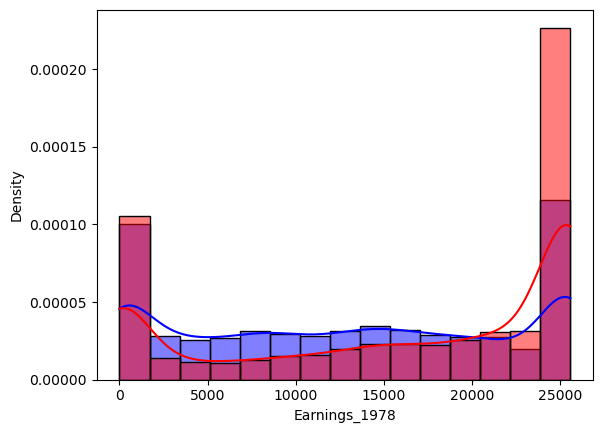

In [3]:
# 1 - Demon
below_50, above_50 = afs.age_splitter(df, 'Age', 50)
print(f"Below 50: {below_50.shape}, Above 50: {above_50.shape}")

# 2 Percentage Under 30
total_people = df.shape[0]
below_30, above_30 = afs.age_splitter(df, 'Age', 30)
percentage_below_30 = (below_30.shape[0] / total_people * 100) if total_people > 0 else 0
print(f"Percentage Below 30: {percentage_below_30:.2f}%")

# 3 - 1978 Earnings Comparison
under_30_1978_avg_wage = below_30['Earnings_1978'].mean()
over_30_1978_avg_wage = above_30['Earnings_1978'].mean()
print(f"Under 30 - 1978 Avg Wage: {under_30_1978_avg_wage:.2f}")
print(f"Over 30 - 1978 Avg Wage: {over_30_1978_avg_wage:.2f}")

sns.histplot(data=below_30, x='Earnings_1978', color='blue', label='Under 30', kde=True, stat="density", alpha=0.5)
sns.histplot(data=above_30, x='Earnings_1978', color='red', label='Over 30', kde=True, stat="density", alpha=0.5)

### Part 2

<ol>
<li>Create a function in the .py file called cohortCompare that takes two arguments - a dataframe and a list of categorical column names. The function should return a dictonary of the key statistics of each numerical columns and counts for categorical columns.</li>
    <ul>
    <li> Mean, Median, Standard Deviation, Min, Max for numerical columns </li>
    <li> Counts for categorical columns </li>
    <li><b>Note:</b> Please use the CohortMetric object to store and manage the statistics for each cohort.</li>
    </ul>
<li> Does this data, at a high level, appear to be representative of the general population of the US in the late 70s? Does it now? Why or why not? </li>
    <ul>
    <li> This does not need to be a long answer or done in increadable depth. This question will generate some demographic profiles of people in the data - does that appear to be similar to the US population at the time? </li>
    <li> Please state how you assessd this. (There isn't one correct answer, the process is more important than the answer) </li>
    </ul>
<li>Print the dictionary returned in a nice way.</li>
</ol>

In [6]:
# 1 - Demo

comparison = afs.cohortCompare(df, ["Hisp", "Race", "MaritalStatus"])

for key, value in comparison.items():
    print(f"{value}")




Cohort: Hisp_NotHispanic
	mean:
Age                 33.237668
Nodeg                0.277224
Earnings_1974    14142.180171
Earnings_1975    13756.469865
Earnings_1978    14959.218906
dtype: float64

	median:
Age                 31.000
Nodeg                0.000
Earnings_1974    15374.370
Earnings_1975    14803.285
Earnings_1978    16717.520
dtype: float64

	std:
Age                11.053444
Nodeg               0.447643
Earnings_1974    9613.783591
Earnings_1975    9316.852138
Earnings_1978    9685.372409
dtype: float64

	min:
Age              16.0
Nodeg             0.0
Earnings_1974     0.0
Earnings_1975     0.0
Earnings_1978     0.0
dtype: float64

	max:
Age                 55.00
Nodeg                1.00
Earnings_1974    25862.32
Earnings_1975    25243.55
Earnings_1978    25564.67
dtype: float64



Cohort: Hisp_hispanic
	mean:
Age                 33.065104
Nodeg                0.535590
Earnings_1974    12401.663826
Earnings_1975    12289.613541
Earnings_1978    13396.677888
dtype: fl

### Part 3

<ol>
<li> Create a function in the .py file called effectSizer that takes in a dataframe, a numerical column name, a column name of a categorical value that is binary (two values only), and returns a dictionary of the categorical classes and their corresponding effect sizes on the numerical value. </li>
<li> For 1978, which of Race, Hisp, MaritalStatus have the largest effect size. (Use Yes/True/1 for x1)</li>
</ol>

In [5]:
# 1. Demo

# Effect sizes of race
effect_sizes_race = afs.effectSizer(df, 'Earnings_1978', 'Race')
effect_sizes_hisp = afs.effectSizer(df, 'Earnings_1978', 'Hisp')
effect_sizes_marital = afs.effectSizer(df, 'Earnings_1978', 'MaritalStatus')
print("Effect Sizes for 1978:")
print("Race:", effect_sizes_race)
print("Hispanic:", effect_sizes_hisp)
print("Marital Status:", effect_sizes_marital)

Effect Sizes for 1978:
Race: 31.26256647424005
Hispanic: 15.915160784126927
Marital Status: 55.440798284647265
